<a href="https://colab.research.google.com/github/zahraShahsavan/Classification-of-Healthcare-Data/blob/main/ML_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Healthcare Dataset

Importing libraries

In [61]:
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV


Using kagglehub API to download data set from Kaggle

In [62]:
path = kagglehub.dataset_download("prasad22/healthcare-dataset")
print("Path to dataset files:", path)

files = os.listdir(path)
print("Files in dataset directory:", files)

Path to dataset files: /root/.cache/kagglehub/datasets/prasad22/healthcare-dataset/versions/2
Files in dataset directory: ['healthcare_dataset.csv']


Load the data set for Kaggle

In [63]:
# Load the dataset
data = pd.read_csv(path+'/healthcare_dataset.csv')

# Data Overview

In [64]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [65]:
# Display the first few rows of the dataset
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


Description for numerical columns

In [66]:
data.describe()


,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


Find the unique values of each columns and also count of each value in categorical columns to understand is the data balanced or not

In [67]:
data['Test Results'].value_counts()

,count
Test Results,
Abnormal,18627
Normal,18517
Inconclusive,18356


In [68]:
data['Medication'].value_counts()

,count
Medication,
Lipitor,11140
Ibuprofen,11127
Aspirin,11094
Paracetamol,11071
Penicillin,11068


In [69]:
data['Admission Type'].value_counts()

,count
Admission Type,
Elective,18655
Urgent,18576
Emergency,18269


In [70]:
data['Insurance Provider'].value_counts()

,count
Insurance Provider,
Cigna,11249
Medicare,11154
UnitedHealthcare,11125
Blue Cross,11059
Aetna,10913


In [71]:
data['Gender'].value_counts()

,count
Gender,
Male,27774
Female,27726


In [72]:
data['Blood Type'].value_counts()


,count
Blood Type,
A-,6969
A+,6956
AB+,6947
AB-,6945
B+,6945
B-,6944
O+,6917
O-,6877


In [73]:
blood_gender_group = data.groupby(['Blood Type', 'Gender']).size().reset_index(name='Count').sort_values(by='Count', ascending=True)
blood_gender_group

,Blood Type,Gender,Count
15,O-,Male,3365
8,B+,Female,3377
1,A+,Male,3392
4,AB+,Female,3438
2,A-,Female,3449
13,O+,Male,3453
6,AB-,Female,3461
10,B-,Female,3461
12,O+,Female,3464
11,B-,Male,3483


In [74]:
data['Medical Condition'].value_counts()

,count
Medical Condition,
Arthritis,9308
Diabetes,9304
Hypertension,9245
Obesity,9231
Cancer,9227
Asthma,9185


In [75]:
data['Insurance Provider'].value_counts()


,count
Insurance Provider,
Cigna,11249
Medicare,11154
UnitedHealthcare,11125
Blue Cross,11059
Aetna,10913


In [76]:
len(data['Doctor'].unique())


40341

In [77]:
data['Doctor'].value_counts()

,count
Doctor,
Michael Smith,27
Robert Smith,22
John Smith,22
Michael Johnson,20
James Smith,20
...,...
Audrey Zimmerman DDS,1
Justin Banks,1
Joseph Williams Jr.,1


In [78]:
len(data['Hospital'].unique())


39876

In [79]:
data['Hospital'].value_counts()

,count
Hospital,
LLC Smith,44
Ltd Smith,39
Johnson PLC,38
Smith Ltd,37
Smith PLC,36
...,...
"and Montoya Flores, Boyer",1
"Carter and Dunn King,",1
"Hall, Brown Black and",1


It seems that the data is balanced

# Data Preprocessing

There is no missing values to handle

In [80]:
# Check for missing values
print(data.isnull().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


Handling duplicate rows by drop duplicates except the first occurance

In [81]:
# Find all duplicate rows (mark all occurrences as duplicates)
all_duplicates = data.duplicated(keep=False).sum()
print(all_duplicates)

# Group by all columns and count the occurrences
duplicate_summary = data.groupby(data.columns.tolist()).size().reset_index(name='Count')

# Filter to show only rows that occur more than once
duplicates_only = duplicate_summary[duplicate_summary['Count'] > 1]
print("Duplicate rows with their counts:")
print(duplicates_only)

data = data.drop_duplicates()

1068
Duplicate rows with their counts:
                  Name  Age  Gender Blood Type Medical Condition  \
50       ABIgaIL YOung   41  Female         O+      Hypertension   
195      ALIcia taYLoR   78    Male         O+            Asthma   
563          AMy GREEN   79  Female         B+           Obesity   
611      ANDREA HansEN   61    Male         O+            Cancer   
645      ANDrEA fREnCH   73    Male         A-         Arthritis   
...                ...  ...     ...        ...               ...   
54733    wiLlIAm mcCOY   80    Male         A-            Asthma   
54749  wiLliE SChWArtz   49  Female         A-         Arthritis   
54758      wiLliam LEe   27  Female         O+         Arthritis   
54800   willIAM DUnCan   78  Female         B-         Arthritis   
54919     zaCHAry balL   85  Female         B-          Diabetes   

      Date of Admission             Doctor                    Hospital  \
50           2022-12-15      Edward Kramer              Moore-Mcdaniel

Convert datetime columns to pandas standard datetime and add new column to show the lenght of stay at hospital. This new column is used in the future process.

In [82]:
# Convert 'Date of Admission' and 'Discharge Date' to datetime format
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

# Calculate Length of Stay (difference between Discharge Date and Date of Admission)
data['Length of Stay'] = (data['Discharge Date'] - data['Date of Admission']).dt.days

<ipython-input-82-f6224ba5011c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
<ipython-input-82-f6224ba5011c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])
<ipython-input-82-f6224ba5011c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Drop the name column as it is not useful in our model and do label encoding on all categorical columns

In [83]:

data = data.drop(columns=['Name'])

# Initialize the label encoder
label_encoder = LabelEncoder()

# Categorical columns to one-hot encode
categorical_cols = ["Gender", "Blood Type", "Medical Condition", "Admission Type", "Medication","Insurance Provider",'Test Results','Doctor','Hospital']

# Apply label encoding for each categorical column
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])


# Display updated dataset
data

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
0,30,1,5,2,2024-01-31,26612,29933,1,18856.281306,328,2,2024-02-02,3,2,2
1,62,1,0,5,2019-08-20,33648,16012,3,33643.327287,265,1,2019-08-26,1,1,6
2,76,0,1,5,2022-09-22,37828,5473,0,27955.096079,205,1,2022-10-07,0,2,15
3,28,0,6,3,2020-11-18,22511,12317,3,37909.782410,450,0,2020-12-18,1,0,30
4,43,0,2,2,2022-09-19,21259,33598,0,14238.317814,458,2,2022-10-09,4,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42,0,6,1,2020-08-16,20003,15553,1,2650.714952,417,0,2020-09-15,4,0,30
55496,61,0,3,5,2020-01-23,37149,31722,2,31457.797307,316,0,2020-02-01,0,2,9
55497,38,0,4,4,2020-07-13,18550,37408,4,27620.764717,347,2,2020-08-10,1,0,28
55498,43,1,7,0,2019-05-25,22665,14329,3,32451.092358,321,0,2019-05-31,1,0,6


It is clear that the numeric columns need to scailing, we can see the value of age is so less than the value of billing amount so we need to do the scaling

In [84]:
# Columns to scale
columns_to_scale = ["Age", "Billing Amount", "Room Number"]

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Apply the scaler to the selected columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

#  Data Visualizing

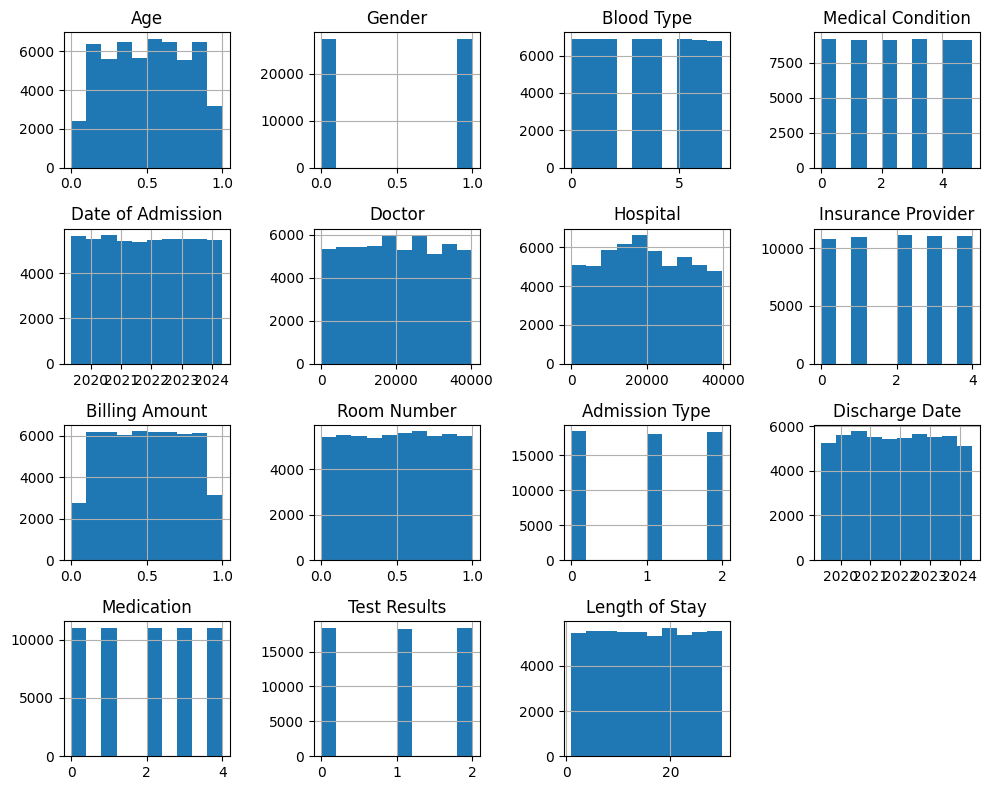

In [85]:
# Histograms of numeric columns
data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

It seems that the distribution of data in all columns is balanced

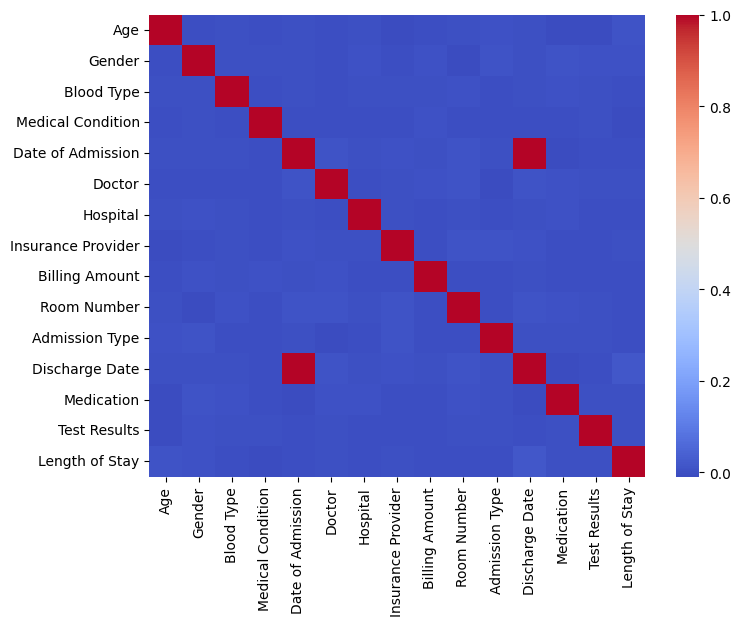

Correlation of features with target column (sorted):
Gender                0.005073
Medical Condition     0.002538
Room Number           0.002204
Length of Stay        0.001289
Doctor                0.000639
Admission Type       -0.000602
Medication           -0.000712
Blood Type           -0.000717
Insurance Provider   -0.001863
Discharge Date       -0.002548
Date of Admission    -0.002570
Billing Amount       -0.002635
Hospital             -0.004723
Age                  -0.006974
Name: Test Results, dtype: float64


In [86]:

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.show()

# Calculate the correlation of all features with the target
target_corr = data.corr()['Test Results'].drop('Test Results')  # drop target self-correlation

# Sort the correlations in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

print("Correlation of features with target column (sorted):")
print(target_corr_sorted)

There is a very Weak Linear Relationships here. Each feature has almost no linear relationship with the target variable.May be there is Non-Linear Relationships.


It is clear that the correlation between the ‘Date of Admission’ and ‘Discharge Date’ columns is about 1, so we add another feature as described before and drop these columns

In [87]:
data = data.drop(columns=['Date of Admission', 'Discharge Date'])  # Assuming 'Test Results' is the column to predict

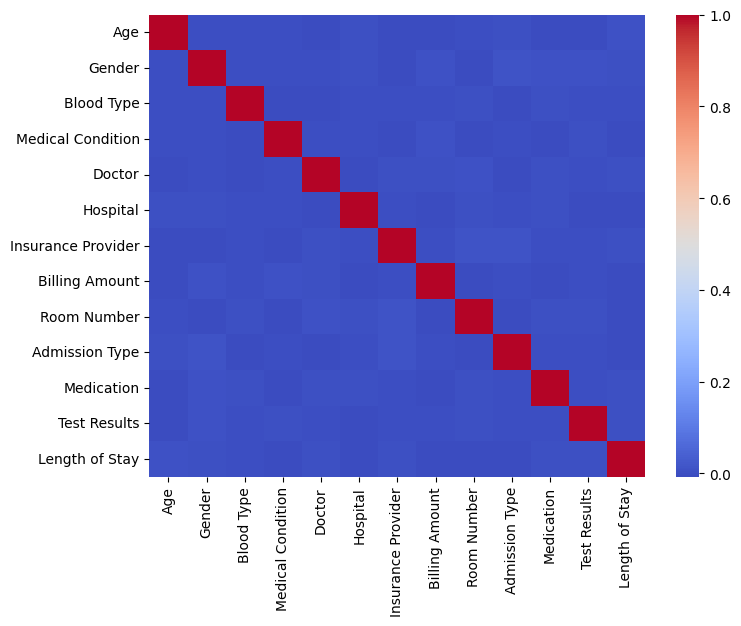

In [88]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.show()

# Splittig data to train and test data

In [89]:
# Split the dataset into features and target variable
X = data.drop(columns=['Test Results'])  # Assuming 'Test Results' is the column to predict
y = data['Test Results']

Scale the X data with MinMaxScaler

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Dimensionality reduction

Do dimensionality reduction to reduce the number of features (dimensions) in the dataset by creating new variables.

In [91]:


# Assume X_train and X_test are already defined (and preferably scaled)
pca = PCA(n_components=0.80)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# If X_train is a DataFrame, capture the original column names; otherwise, generate generic names
if hasattr(X_train, 'columns'):
    original_columns = X_train.columns
else:
    original_columns = [f"Feature {i}" for i in range(X_train.shape[1])]

# Print the number of principal components and the explained variance ratio for each
print(f"PCA reduced the feature space from {len(original_columns)} features to {pca.n_components_} principal components.\n")
print("Explained Variance Ratio for each component:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"  Component {i+1}: {var:.2%}")

# Create a DataFrame to show loadings: how much each original feature contributes to each component
loadings = pd.DataFrame(pca.components_.T,
                        index=original_columns,
                        columns=[f"PC{i+1}" for i in range(pca.n_components_)])
print("\nLoadings (contribution of original features to each principal component):")
print(loadings)

# Optionally, print the top contributing feature for each principal component
print("\nTop contributing feature for each principal component:")
for i in range(pca.n_components_):
    # Find the feature with the highest absolute loading in the component
    top_feature = loadings.iloc[:, i].abs().idxmax()
    top_loading = loadings.loc[top_feature, f"PC{i+1}"]
    print(f"  Component {i+1} is most influenced by '{top_feature}' (loading: {top_loading:.4f})")


PCA reduced the feature space from 12 features to 2 principal components.

Explained Variance Ratio for each component:
  Component 1: 51.80%
  Component 2: 48.20%

Loadings (contribution of original features to each principal component):
                             PC1           PC2
Age                -1.949760e-07  3.018619e-08
Gender             -1.695904e-07  1.813399e-07
Blood Type         -7.321664e-07 -1.926538e-08
Medical Condition  -1.763309e-07 -6.293887e-08
Doctor              9.987439e-01  5.010677e-02
Hospital           -5.010677e-02  9.987439e-01
Insurance Provider -1.503556e-07 -1.222609e-08
Billing Amount      6.769641e-08 -4.864604e-08
Room Number         2.086893e-07 -8.807687e-08
Admission Type     -4.971444e-07  7.780349e-08
Medication          4.712679e-07  6.493836e-07
Length of Stay      3.321493e-06 -2.796656e-06

Top contributing feature for each principal component:
  Component 1 is most influenced by 'Doctor' (loading: 0.9987)
  Component 2 is most influence

# Train and evaluate models

In [92]:


def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Train and evaluate the given model on the provided data.

    Args:
        model: The machine learning model to be trained and evaluated.
        X_train: Features for training.
        X_test: Features for testing.
        y_train: Target labels for training.
        y_test: Target labels for testing.

    This function prints the classification report, confusion matrix,
    running time, and, if the model is a decision tree, plots its structure.
    """
    # Start the timer
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # End the timer
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Evaluate the model
    print(f"\nModel: {model}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(cm)
    print(f"Time taken for training and evaluation: {elapsed_time:.4f} seconds\n")

    # Plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Class 0', 'Class 1', 'Class 2'],
                yticklabels=['Class 0', 'Class 1', 'Class 2'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # # If the model is a Decision Tree, plot its tree structure
    # if isinstance(model, DecisionTreeClassifier):
    #     plt.figure(figsize=(12,8))
    #     # If X_train is a DataFrame, use its columns as feature names; otherwise, set to None.
    #     feature_names = X_train.columns if hasattr(X_train, "columns") else None
    #     plot_tree(model, filled=True, feature_names=feature_names, rounded=True)
    #     plt.title('Decision Tree Structure')
    #     plt.show()



Model: LogisticRegression(max_iter=1000)
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.69      0.44      3616
           1       0.33      0.20      0.25      3682
           2       0.36      0.11      0.17      3696

    accuracy                           0.33     10994
   macro avg       0.34      0.33      0.29     10994
weighted avg       0.34      0.33      0.28     10994

Confusion Matrix:
[[2481  796  339]
 [2568  735  379]
 [2576  719  401]]
Time taken for training and evaluation: 0.2587 seconds



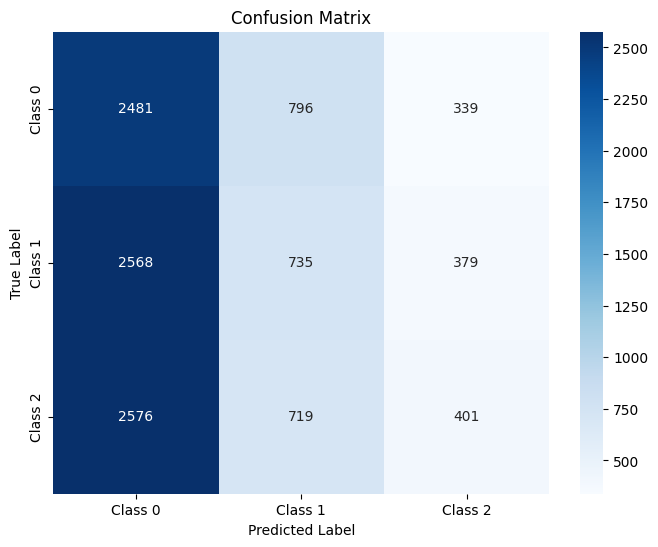


Model: DecisionTreeClassifier(random_state=42)
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.43      0.43      3616
           1       0.44      0.43      0.44      3682
           2       0.42      0.42      0.42      3696

    accuracy                           0.43     10994
   macro avg       0.43      0.43      0.43     10994
weighted avg       0.43      0.43      0.43     10994

Confusion Matrix:
[[1571  973 1072]
 [1017 1592 1073]
 [1061 1066 1569]]
Time taken for training and evaluation: 0.5139 seconds



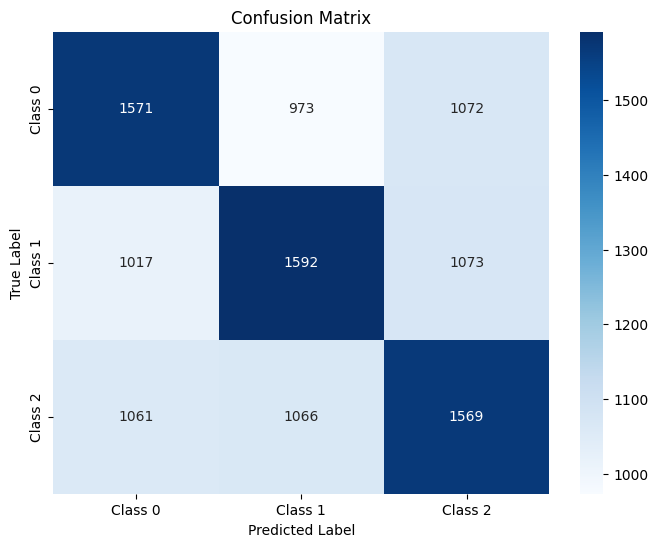

In [93]:
# Train and evaluate Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000)
train_evaluate_model(log_reg_model, X_train_pca, X_test_pca, y_train, y_test)

# Train and evaluate Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
train_evaluate_model(dt_model, X_train_pca, X_test_pca, y_train, y_test)



Model: KNeighborsClassifier(n_neighbors=1)
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.44      0.44      3616
           1       0.44      0.43      0.44      3682
           2       0.44      0.43      0.43      3696

    accuracy                           0.44     10994
   macro avg       0.44      0.44      0.44     10994
weighted avg       0.44      0.44      0.44     10994

Confusion Matrix:
[[1599 1010 1007]
 [1033 1601 1048]
 [1059 1040 1597]]
Time taken for training and evaluation: 0.6663 seconds



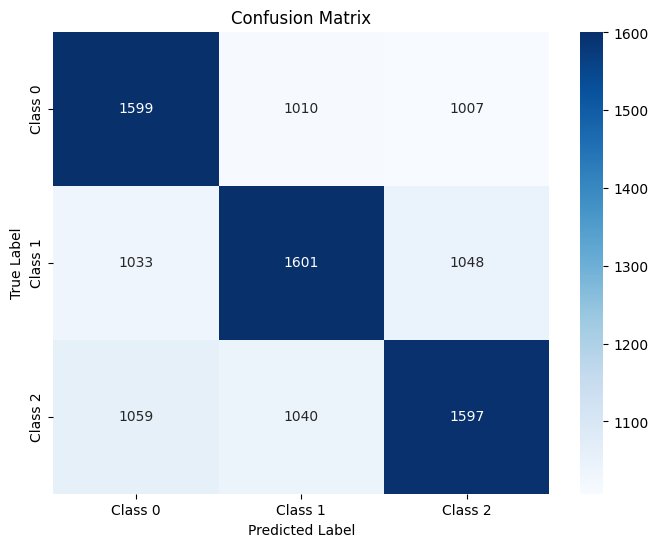


Model: RandomForestClassifier(random_state=42)
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.45      0.44      3616
           1       0.44      0.44      0.44      3682
           2       0.43      0.42      0.43      3696

    accuracy                           0.44     10994
   macro avg       0.44      0.44      0.44     10994
weighted avg       0.44      0.44      0.44     10994

Confusion Matrix:
[[1637  984  995]
 [1045 1608 1029]
 [1077 1066 1553]]
Time taken for training and evaluation: 22.9838 seconds



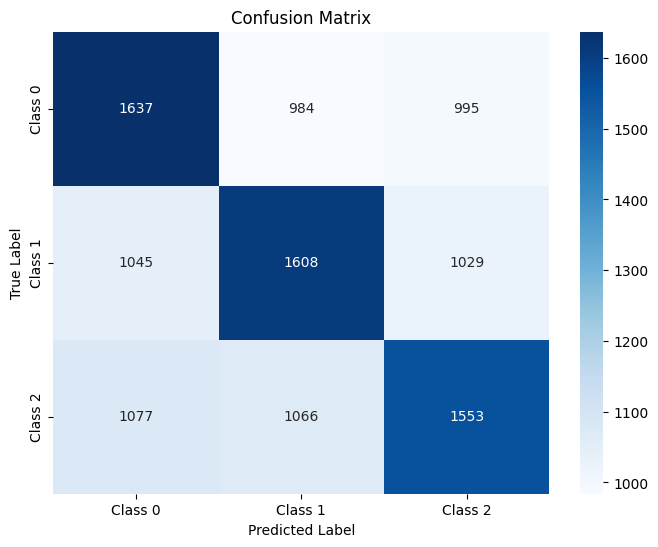

In [94]:
knn_model = KNeighborsClassifier(n_neighbors=1)
train_evaluate_model(knn_model, X_train, X_test, y_train, y_test)

# Train and evaluate Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_evaluate_model(rf_model, X_train_pca, X_test_pca, y_train, y_test)



# Hyperparametes tuning

Best parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

Model: LogisticRegression(C=0.01, max_iter=1000)
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.69      0.44      3616
           1       0.33      0.20      0.25      3682
           2       0.36      0.11      0.17      3696

    accuracy                           0.33     10994
   macro avg       0.34      0.33      0.29     10994
weighted avg       0.34      0.33      0.28     10994

Confusion Matrix:
[[2481  796  339]
 [2568  735  379]
 [2576  719  401]]
Time taken for training and evaluation: 0.2846 seconds



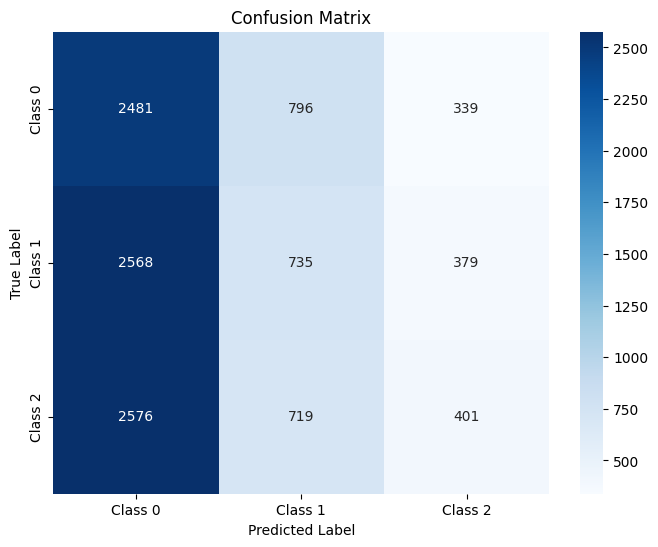

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model: DecisionTreeClassifier(random_state=42)
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.43      0.43      3616
           1       0.44      0.43      0.44      3682
           2       0.42      0.42      0.42      3696

    accuracy                           0.43     10994
   macro avg       0.43      0.43      0.43     10994
weighted avg       0.43      0.43      0.43     10994

Confusion Matrix:
[[1571  973 1072]
 [1017 1592 1073]
 [1061 1066 1569]]
Time taken for training and evaluation: 0.7490 seconds



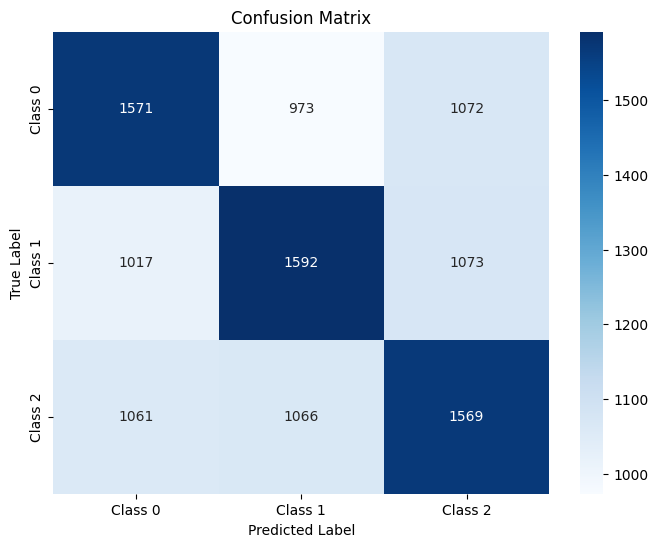

Best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Model: RandomForestClassifier(random_state=42)
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.45      0.44      3616
           1       0.44      0.44      0.44      3682
           2       0.43      0.42      0.43      3696

    accuracy                           0.44     10994
   macro avg       0.44      0.44      0.44     10994
weighted avg       0.44      0.44      0.44     10994

Confusion Matrix:
[[1637  984  995]
 [1045 1608 1029]
 [1077 1066 1553]]
Time taken for training and evaluation: 22.7162 seconds



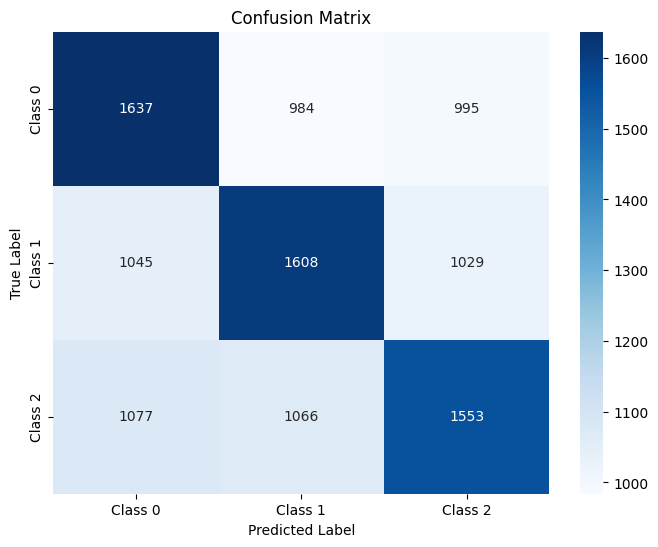

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

Model: KNeighborsClassifier(metric='manhattan', weights='distance')
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.44      0.43      3616
           1       0.44      0.43      0.43      3682
           2       0.43      0.43      0.43      3696

    accuracy                           0.43     10994
   macro avg       0.43      0.43      0.43     10994
weighted avg       0.43      0.43      0.43     10994

Confusion Matrix:
[[1594  987 1035]
 [1052 1587 1043]
 [1067 1055 1574]]
Time taken for training and evaluation: 0.0702 seconds



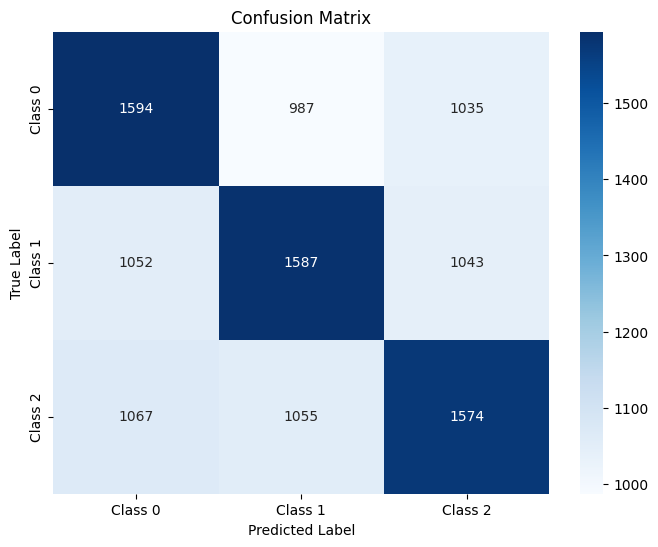

In [95]:


#############################################
# 1. Logistic Regression Grid Search
#############################################

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid_lr = GridSearchCV(
    log_reg_model,
    param_grid_lr,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_lr.fit(X_train_pca, y_train)
print("Best parameters for Logistic Regression:", grid_lr.best_params_)
best_lr = grid_lr.best_estimator_

# Evaluate the best Logistic Regression model
train_evaluate_model(best_lr, X_train_pca, X_test_pca, y_train, y_test)

#############################################
# 2. Decision Tree Grid Search
#############################################

# Define parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_dt = GridSearchCV(
    dt_model,
    param_grid_dt,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_dt.fit(X_train_pca, y_train)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
best_dt = grid_dt.best_estimator_

# Evaluate the best Decision Tree model
train_evaluate_model(best_dt, X_train_pca, X_test_pca, y_train, y_test)

#############################################
# 3. Random Forest Grid Search
#############################################

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    rf_model,
    param_grid_rf,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_rf.fit(X_train_pca, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

# Evaluate the best Random Forest model
train_evaluate_model(best_rf, X_train_pca, X_test_pca, y_train, y_test)


#############################################
# 4. KNN Grid Search
#############################################


# Define parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']  # metric for distance calculation
}

grid_knn = GridSearchCV(
    knn_model,
    param_grid_knn,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_knn.fit(X_train_pca, y_train)
print("Best parameters for KNN:", grid_knn.best_params_)
best_knn = grid_knn.best_estimator_

# Evaluate the best KNN model
train_evaluate_model(best_knn, X_train_pca, X_test_pca, y_train, y_test)
